___
# MINIPROJETO 1

## <font color='red'>COLOQUE AQUI SEU NOME</font>
___

## <font color='blue'>População rural no mundo</font>

___
### Itens 1 a 3 - Resolução:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import itertools

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Paulo\Documents\GitHub\CD\Mini projeto 1


In [2]:
dados = pd.read_excel("WDI-world.xlsx")

In [3]:
p_rural = pd.Series(dados.iloc[1191,5:58])
p_rural.columns = ['População rural']
p_rural = p_rural.astype('float')
p_rural = p_rural.divide(1.0e+09) #para se tornar continua

In [4]:

#plt.legend(loc='upper left')
plt.show()

___
### Itens 4 a 6 - Resolução:

É um caso  de simetria negativa.

Ele pode seguir a distribuição de Gauss hyperbolico,pois a curva de Gauss quando "c"(um dos argumentos) é parecido com uma curva exponencial. Tambem pode ser usado beta pois ela se enquandra em varios modelos, e pode ser semelhante uma curva exponencial. 

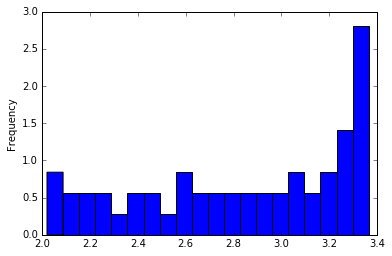

In [6]:
x = np.linspace(2.000000,3.36,15)

a = 2
b = 1
c = 0.5
z = 2.5

plot = p_rural.plot.hist(bins=20,label = 'CO2',normed = 1)

plt.plot(x, stats.gausshyper.pdf(x, a, b, c, z), color='red')

d = 7
e = 1.1

plt.plot(x, stats.beta.pdf(x, d, e),color = 'green')

2.31974178174 0.89547946516 0.667445855908 2.65950427468


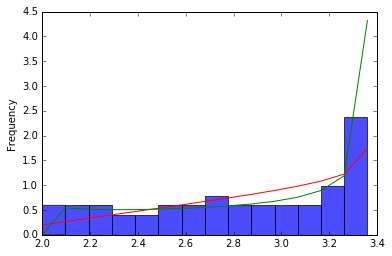

In [7]:



plot = p_rural.plot.hist(bins=x,label = 'CO2',alpha = 0.7,normed=1)

#gauss hyperbolico, ele normalme se parece uma curva em forma de sino.
a,b,c,z,loc1,scale1 = stats.gausshyper.fit(p_rural) #a= altura do "sino", b = posição de x de a, c = Desvio padrão
plt.plot(x, stats.gausshyper.pdf(x, a, b, c, z,loc1,scale1), '-', color='red', label="Gauss")
print(a,b,c,z)

#beta
d,e,loc2,scale2 = stats.beta.fit(p_rural)
plt.plot(x, stats.beta.pdf(x, d, e, loc2, scale2), '-', color='green', label="Poisson")

___
### Itens 7 a 9 - Resolução:

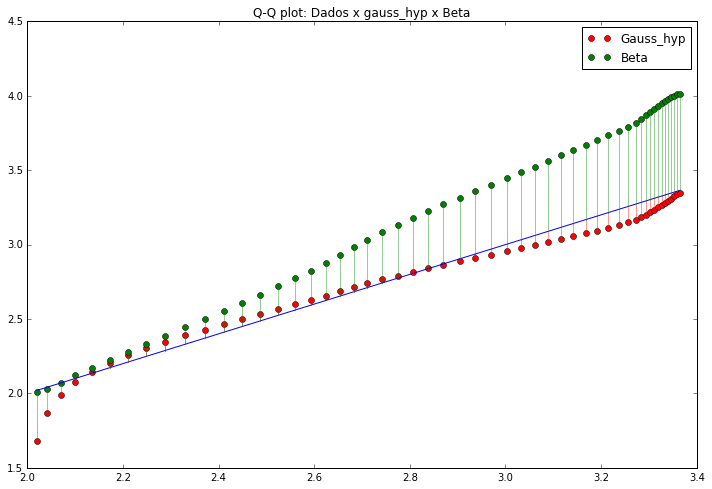

In [8]:
# dados ordenados e quantis teóricos - QQplot

# Calcula a frequência relativa acumulada com os dados vindos dos arquivos
fra = [] # frequencia relativa acumulada
for i in range(len(p_rural)):
    acc = (i - 0.5) / len(p_rural)
    if acc < 0:
        acc = 0
    fra.append(acc) # ver Magalhães e Lima (pag. 195)

# Convertemos fra em uma Series do Pandas
fra = pd.Series(data=fra)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_gauss = stats.gausshyper.ppf(fra, a, b, c, z, loc=loc1, scale=scale1)
q_beta = stats.beta.ppf(fra, d, e, loc=loc2, scale=loc2) # quantis teóricos da beta


fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x gauss_hyp x Beta")

gauss_plot, = plt.plot(p_rural, q_gauss, 'o', color="red", label="Gauss_hyp")
beta_plot, = plt.plot(p_rural, q_beta, 'o', color="green", label = "Beta")

plt.legend(handles=[gauss_plot, beta_plot])
plt.plot((min(p_rural), max(p_rural)), (min(p_rural), max(p_rural)), '-')


for i in range(len(p_rural)):
    plt.plot((p_rural[i], p_rural[i]), (q_gauss[i], p_rural[i]), '-', color='red', alpha=0.4  )
    plt.plot((p_rural[i], p_rural[i]), (q_beta[i], p_rural[i]), '-', color='green', alpha=0.4  )



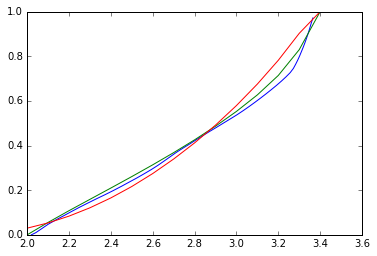

In [9]:
x1 = np.linspace(2.000000,3.4,15)# mudei o "x" para a distribuição acumulada chegar a 1 (esse "x" é so usado no grafico abaixo)
                                 # se o x fosse mudado antes o histograma do exercio 6 ficaria errado

lista_guass = []
lista_beta = []

for i in x1:
    v1 = stats.gausshyper.cdf(i, a, b, c, z,loc1,scale1)
    v2 = stats.beta.cdf(i, d, e, loc=loc2, scale=scale2)
    
    lista_guass.append(v1)
    lista_beta.append(v2)


plt.plot(p_rural,fra, '-', color='blue', label="Gauss")
plt.plot(x1,lista_beta, '-', color='green', label="Gauss")
plt.plot(x1,lista_guass, '-', color='red', label="Gauss")



Esse grafico mostra as diferentes probabilidades acumuladas pelas 2 funçoes e pelo modelo real. Como podemos ver as probabilidades acumuladas de gauss hyp e Beta são semelhantes a real.  

___
### Itens 10 e 11 - Resolução:

In [10]:
#Erro quadrático

erro_quadratico_Gauss = sum((p_rural - q_gauss)**2)
erro_quadratico_beta = sum((p_rural - q_beta)**2)

print("Erro quadrático da gauss :{:4.3f}\n".format(erro_quadratico_Gauss))
print("Erro quadrático da beta :{:4.3f}\n".format(erro_quadratico_beta))

Erro quadrático da gauss :0.329

Erro quadrático da beta :9.404



In [11]:
# dados para a tabela abaixo

print(np.mean(q_gauss))#media do qq plot de gauss hiperbolico
print(np.mean(q_beta))#media do qq plot de gauss hiperbolico


2.80384041653
3.19999587931





|data| Gauss hyp |  Beta  |
|------|------|------|
|Erro quadratico|  2.803   | 3.2|
|Média de Q-Q|   0.329  | 9.404|




### Conclusão:

podemos ver que nesse caso a distribuição de Gaus é a melhor opção, apesar que nos primeiros pontos ela tem uma taxa de erro alta(principalmente se consideramos que a população esta em bilhões assim o erro pode passar de 250 millhoes), porem o erro diminue e se torna pequeno, tornando-se o melhor modelo para esse sistema como mostra o erro quadratico, que é 10 vezes menos que o erro de beta. O modelo beta consegue prever os primeiros dados com precisão, porem quanto maior é o "x" maior é o erro de beta.